## 决策树的直接调用与Titanic数据集的探索 

In [1]:
# 必要的引入
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 读取数据并打印基本信息

In [2]:
data = pd.read_csv(os.path.join("./input", "titanic.csv"), sep=",")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [4]:
data.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


#### 预测目标的基本分布

In [5]:
data['survived'].value_counts(normalize=True)

0    0.658035
1    0.341965
Name: survived, dtype: float64

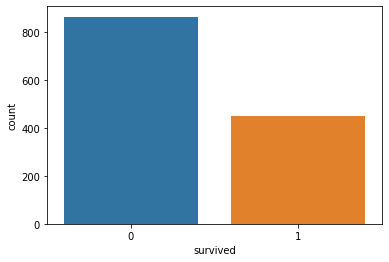

In [6]:
sns.countplot(data['survived'])

#### 舱位与预测目标的关系

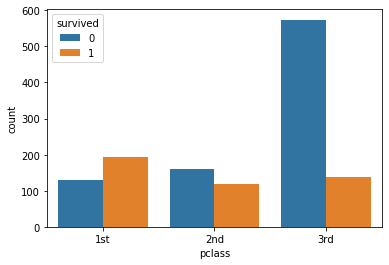

In [7]:
sns.countplot(data['pclass'], hue=data['survived'])

#### 名字的信息

In [8]:
data['name'].head()

0                       Allen, Miss Elisabeth Walton
1                        Allison, Miss Helen Loraine
2                Allison, Mr Hudson Joshua Creighton
3    Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)
4                      Allison, Master Hudson Trevor
Name: name, dtype: object

#### 对名字属性进行变换  
- 取名字的title

In [9]:
data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])

In [10]:
data['name_title'].value_counts()

Mr           747
Miss         236
Mrs          200
Master        59
Ms            17
Dr             7
Rev            6
Thomas         2
Major          2
Colonel        2
Rev.           2
Col            2
Dr.            1
Madame         1
Albert         1
Eino           1
Berglund.      1
Jenny          1
Jonkheer       1
Jacobsohn      1
Simon          1
Captain        1
Khalil         1
the            1
Hilda          1
Oscar          1
Lady           1
Sir            1
Mlle           1
Barton         1
Sander         1
W.             1
Mansouer       1
Rene           1
Ernst          1
Nikolai        1
Nils           1
Mlle.          1
William        1
Richard        1
Leo            1
Delia          1
Seman          1
Name: name_title, dtype: int64

#### 名字的title与存活与否的关系

In [11]:
data['survived'].groupby(data['name_title']).mean()

name_title
Albert       0.000000
Barton       0.000000
Berglund.    0.000000
Captain      0.000000
Col          0.500000
Colonel      0.500000
Delia        0.000000
Dr           0.428571
Dr.          1.000000
Eino         1.000000
Ernst        0.000000
Hilda        1.000000
Jacobsohn    0.000000
Jenny        0.000000
Jonkheer     0.000000
Khalil       1.000000
Lady         1.000000
Leo          0.000000
Madame       1.000000
Major        0.500000
Mansouer     1.000000
Master       0.389831
Miss         0.588983
Mlle         0.000000
Mlle.        1.000000
Mr           0.144578
Mrs          0.740000
Ms           0.823529
Nikolai      0.000000
Nils         0.000000
Oscar        1.000000
Rene         0.000000
Rev          0.000000
Rev.         0.000000
Richard      0.000000
Sander       0.000000
Seman        0.000000
Simon        0.000000
Sir          1.000000
Thomas       0.000000
W.           0.000000
William      0.000000
the          1.000000
Name: survived, dtype: float64

#### 取名字的长度

In [12]:
data['name_len'] = data['name'].apply(lambda x: len(x))

#### 名字长度与存活与否的关系

In [13]:
data['survived'].groupby(pd.qcut(data['name_len'], 5)).mean()

name_len
(10.999, 17.0]    0.183746
(17.0, 20.0]      0.288321
(20.0, 24.0]      0.285171
(24.0, 28.0]      0.369295
(28.0, 62.0]      0.611111
Name: survived, dtype: float64

#### 性别的分布与最后幸存的关系

In [14]:
data['sex'].value_counts(normalize=True)

male      0.647372
female    0.352628
Name: sex, dtype: float64

In [15]:
data['survived'].groupby(data['sex']).mean()

sex
female    0.663067
male      0.167059
Name: survived, dtype: float64

#### 年龄与幸存的关系  
- 缺失数据的处理  
  1 实值： 中位数或者平均数去补  
  2 类别： major class去补

In [16]:
data['survived'].groupby(pd.qcut(data['age'], 5)).mean()

age
(0.166, 19.0]    0.578125
(19.0, 26.0]     0.354610
(26.0, 33.0]     0.400000
(33.0, 45.0]     0.447761
(45.0, 71.0]     0.443478
Name: survived, dtype: float64

#### 登船的地点与幸存的关系

In [17]:
data['embarked'].value_counts()

Southampton    573
Cherbourg      203
Queenstown      45
Name: embarked, dtype: int64

In [18]:
data['survived'].groupby(data['embarked']).mean()

embarked
Cherbourg      0.586207
Queenstown     0.311111
Southampton    0.399651
Name: survived, dtype: float64

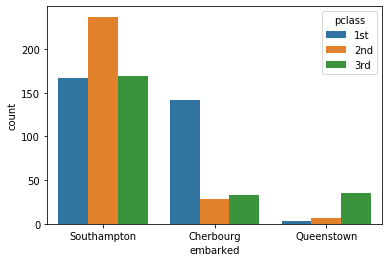

In [19]:
sns.countplot(data['embarked'], hue=data['pclass'])

#### 目的地与幸存的关系

In [20]:
data['survived'].groupby(data['home.dest'].apply(lambda x: str(x).split(',')[-1])).mean()

home.dest
 AB            1.000000
 AZ            0.000000
 Australia     0.000000
 BC            0.250000
 Birmingham    0.000000
                 ...   
Russia         1.000000
Southampton    0.666667
Spain          1.000000
Syria          0.000000
nan            0.180680
Name: survived, Length: 117, dtype: float64

#### room, ticket, boat缺失数据太多，舍弃不用

### 新来了一个小鲜肉，基本信息如下  


#### Feature Transform

In [21]:
def name(data):
    data['name_len'] = data['name'].apply(lambda x: len(x))
    data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])
    del data['name']
    return data

def age(data):
    data['age_flag'] = data['age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    grouped_age = data.groupby(['name_title', 'pclass'])['age']
    data['age'] = grouped_age.transform(lambda x: x.fillna(data['age'].mean()) if pd.isnull(x.mean()) else x.fillna(x.mean()))
    return data

def embark(data):
    data['embarked'] = data['embarked'].fillna('Southampton')
    return data


def dummies(data, columns=['pclass','name_title','embarked', 'sex']):
    for col in columns:
        data[col] = data[col].apply(lambda x: str(x))
        new_cols = [col + '_' + i for i in data[col].unique()]
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)[new_cols]], axis=1)
        del data[col]
    return data

#### 预处理输入数据  
- 去掉不需要的特征  
- 对某些特征进行变换

In [22]:
drop_columns = ['row.names', 'home.dest', 'room', 'ticket', 'boat'] #+ ['ticket_len', 'ticket_title']
data = data.drop(drop_columns, axis=1)
data.head()

,pclass,survived,name,age,embarked,sex,name_title,name_len
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,female,Miss,28
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,female,Miss,27
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,male,Mr,35
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,female,Mrs,47
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,male,Master,29


In [23]:
data = name(data)
data = age(data)
data = embark(data)
data = dummies(data)
data.head()

,survived,age,name_len,age_flag,pclass_1st,pclass_2nd,pclass_3rd,name_title_Miss,name_title_Mr,name_title_Mrs,...,name_title_Simon,name_title_William,name_title_Seman,name_title_Rene,name_title_Leo,embarked_Southampton,embarked_Cherbourg,embarked_Queenstown,sex_female,sex_male
0,1,29.0000,28,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,2.0000,27,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,30.0000,35,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,25.0000,47,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,1,0.9167,29,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


####  调用决策树模型并预测结果

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree
trainX, testX, trainY, testY = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=33)

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [26]:
measure_performance(testX, testY, model)

Accuracy:0.791 

Classification report
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       164
           1       0.88      0.52      0.65        99

    accuracy                           0.79       263
   macro avg       0.82      0.74      0.75       263
weighted avg       0.81      0.79      0.78       263
 

Confusion matrix
[[157   7]
 [ 48  51]] 



#### 不做特征分析直接调用决策树模型

In [27]:
sub_columns = ['age', 'sex_male','sex_female']
sub_trainX = trainX[sub_columns]
sub_testX = testX[sub_columns]
sub_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
sub_model.fit(sub_trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
measure_performance(sub_testX, testY, sub_model)

Accuracy:0.768 

Classification report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.72      0.64      0.67        99

    accuracy                           0.77       263
   macro avg       0.76      0.74      0.75       263
weighted avg       0.76      0.77      0.77       263
 

Confusion matrix
[[139  25]
 [ 36  63]] 



#### 可视化决策树

In [30]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=trainX.columns) 
graph = graphviz.Source(dot_data) 
#graph.render("titanic") 
#graph.view()

#### display graph inline

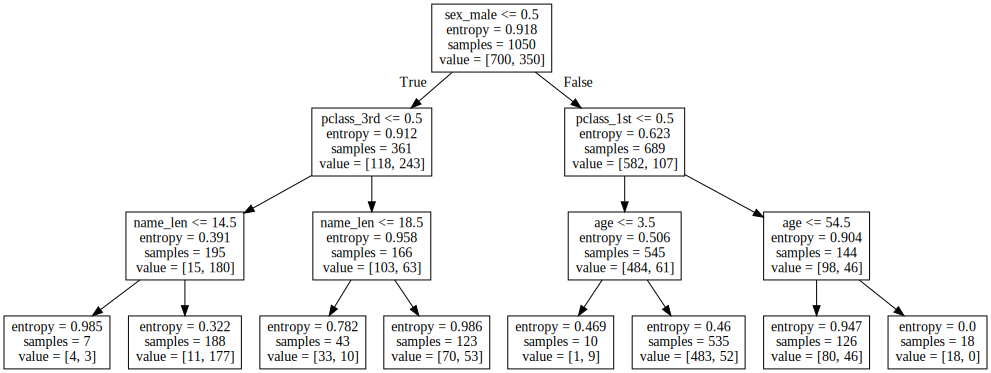

In [31]:
graph

#### 展示特征的重要性

In [32]:
pd.concat([pd.DataFrame(trainX.columns, columns=['variable']),
         pd.DataFrame(model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:20]

,variable,importance
53,sex_male,0.553725
5,pclass_3rd,0.252415
0,age,0.095847
3,pclass_1st,0.063084
1,name_len,0.034928
29,name_title_Ernst,0.000000
31,name_title_Hilda,0.000000
32,name_title_Delia,0.000000
33,name_title_Jenny,0.000000
34,name_title_Oscar,0.000000
